In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\abrah\OneDrive - The University of Texas at Dallas\rideshare_kaggle.csv"
rideshare_data = pd.read_csv(file_path)

# Step 1: Drop rows with missing values
cleaned_data = rideshare_data.dropna()

Variables correlated to price:
 price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
product_id                     0.102679
icon                           0.002100
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
short_summary                  0.001245
windGust                       0.001218
id                             0.001137
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTi

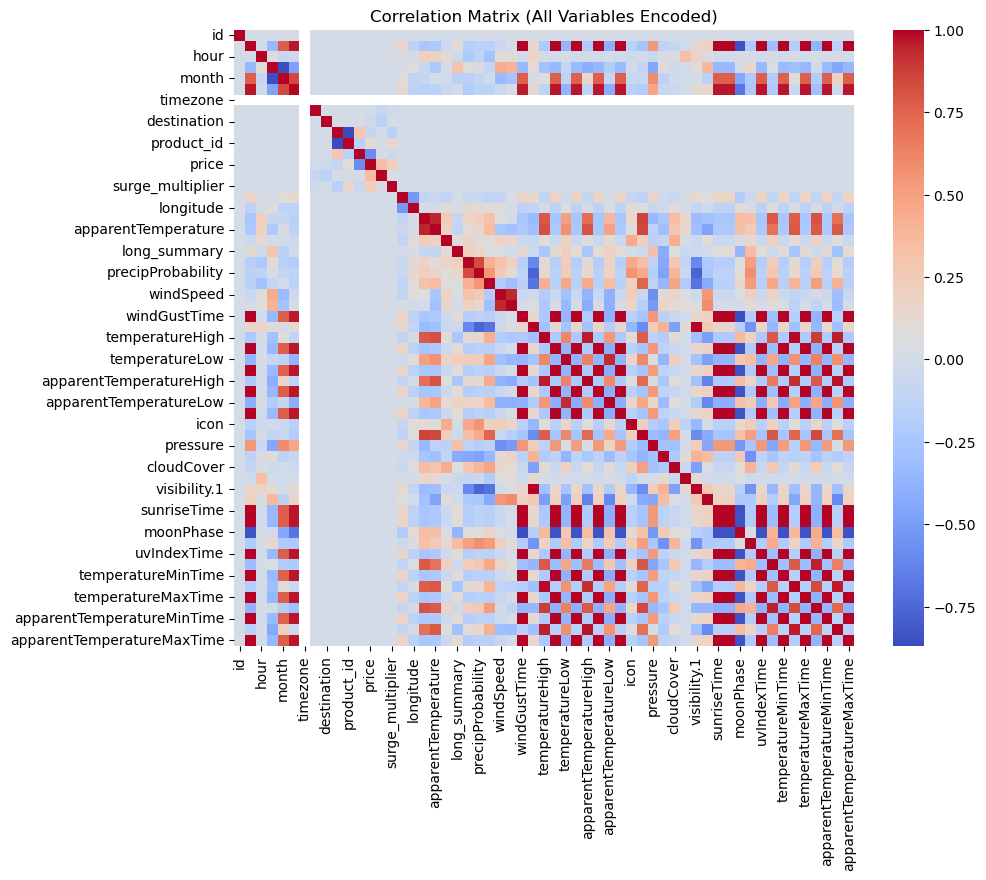

In [3]:
# Step 2: Compute Correlation Matrix
from sklearn.preprocessing import LabelEncoder

# Encode non-numeric variables
encoded_data = cleaned_data.copy()

# Apply Label Encoding to non-numeric columns
for column in encoded_data.select_dtypes(include=['object', 'category']):
    encoded_data[column] = LabelEncoder().fit_transform(encoded_data[column])

# Compute the Correlation Matrix including all variables
correlation_matrix = encoded_data.corr()

# Focus on correlations with the 'price' column
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Print variables correlated to price
print("Variables correlated to price:\n", price_correlation)

# Visualize the full correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (All Variables Encoded)")
plt.show()

Mean Squared Error (MSE): 76.77060785387421
R-squared (R2): 0.11940541734213972


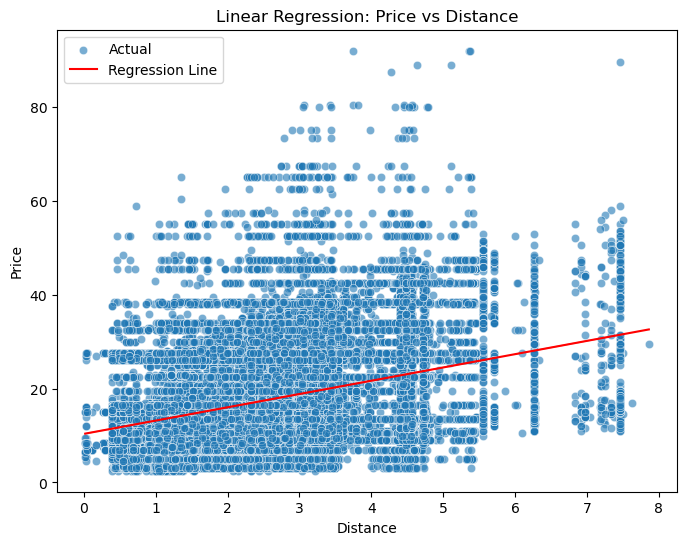

In [5]:
# Step 4: Linear Regression Model for Price vs Distance
# Prepare data
X = cleaned_data[['distance']]  # Predictor
y = cleaned_data['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualization of the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['distance'], y=y_test, alpha=0.6, label="Actual")
sns.lineplot(x=X_test['distance'], y=y_pred, color='red', label="Regression Line")
plt.title("Linear Regression: Price vs Distance")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend()
plt.show()

Mean Squared Error (MSE): 6.329628750448783
R-squared (R²): 0.9273962139457079


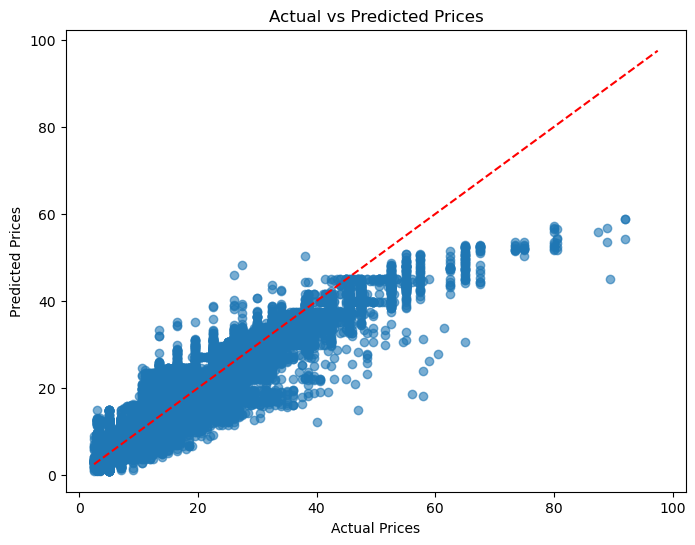

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Step 1: Encode 'product_id' using one-hot encoding
encoded_data = pd.get_dummies(cleaned_data, columns=['product_id'], drop_first=True)

# Step 2: Define predictors (distance, surge_multiplier, and product_id columns) and target (price)
X = encoded_data[['distance', 'surge_multiplier'] + [col for col in encoded_data.columns if col.startswith('product_id_')]]
y = encoded_data['price']

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate the model
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# Step 1: Define parameter grid for Polynomial Regression degree and Ridge alpha
param_grid_ridge_poly = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5],  # Polynomial degrees
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Ridge regularization strength
}

# Create a pipeline for polynomial regression with Ridge regularization
ridge_poly_pipeline = Pipeline([
    ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
    ('ridge', Ridge())
])

In [11]:
# Perform Grid Search
grid_search_ridge_poly = GridSearchCV(ridge_poly_pipeline, param_grid_ridge_poly, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge_poly.fit(X_train, y_train)

# Best combination of polynomial degree and Ridge alpha
best_degree_ridge = grid_search_ridge_poly.best_params_['polynomialfeatures__degree']
best_alpha_ridge = grid_search_ridge_poly.best_params_['ridge__alpha']
best_ridge_poly_model = grid_search_ridge_poly.best_estimator_

# Predict and evaluate the polynomial with Ridge regression
y_pred_ridge_poly = best_ridge_poly_model.predict(X_test)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)

# Output the best parameters and evaluation metrics
print(f"Optimal Polynomial Degree: {best_degree_ridge}")
print(f"Optimal Ridge Alpha: {best_alpha_ridge}")
print(f"Polynomial + Ridge Regression - R-squared (R²): {r2_ridge_poly}")

C:\Users\abrah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abrah\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abrah\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abrah\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fi

Optimal Polynomial Degree: 3
Optimal Ridge Alpha: 0.1
Polynomial + Ridge Regression - R-squared (R²): 0.9611540885615378


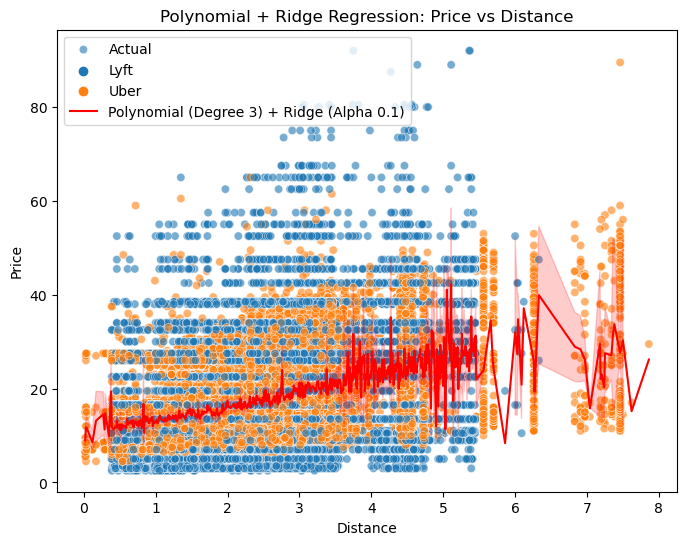

In [15]:
# Visualize Polynomial + Ridge regression results
plt.figure(figsize=(8, 6))

# Ensure we reference the correct dataset for 'cab_type' and match indices
sns.scatterplot(x=X_test['distance'], y=y_test, alpha=0.6, label='Actual', hue=cleaned_data.loc[X_test.index, 'cab_type'])

# Plot the regression line for Polynomial + Ridge model
sns.lineplot(x=X_test['distance'], y=y_pred_ridge_poly, color='red', label=f'Polynomial (Degree {best_degree_ridge}) + Ridge (Alpha {best_alpha_ridge})')

# Set the plot title and labels
plt.title("Polynomial + Ridge Regression: Price vs Distance")
plt.xlabel("Distance")
plt.ylabel("Price")

# Show the legend
plt.legend()

# Display the plot
plt.show()
